## LQR - State Analysis

LQR is an optimal control algorithm that calculates the best effective control input given the Q and R matrices to the controller for estimating the best K control matrix to apply to the state input.


For the simulation our findings are:

- HIGH Q, LOW R FINISHED AND GET THE GOALS VERY FAST

- HIGH R, LOW Q ONLY STAYS ON GOAL 3

- HIGH R, HIGH Q ACHIEVES ALL GOALS VERY CONSERVATIVE

- LOW R, LOW Q ONLY STAYS ON GOAL 1

- MID Q, MID R A WELL BALANCE BETWEEN GOAL AND RESPONSE INPUT

#### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

#### Load the log file and calculcate position and goals

In [2]:
fpaths = glob.glob('*.csv', recursive=True)
fpath = fpaths[1]
fpaths

['log_task4.csv',
 'log_task4_best.csv',
 'log_task4_high_q_high_r.csv',
 'log_task4_high_q_low_r.csv',
 'log_task4_high_r_low_q.csv',
 'log_task4_low_q_low_r.csv',
 'log_task4_mid_q_mid_r.csv']

#### This are the parameters of the simulation that corresponds to this task

In [3]:
df = pd.read_csv(fpath, nrows=1)
df.head(2)

,q_diag,r_diag,horizon,tolerance,dt_
0,0.85,0.2,100,0.2,0.2


In [4]:
df = pd.read_csv('log_task4.csv', skiprows=2)

df['Goal'] = np.sqrt(df.X_Goal**2+df.Y_Goal**2)
df['Pos'] = np.sqrt(df.X_Pos**2+df.Y_Pos**2)
df['error_x'] = df.X_Goal - df.X_Pos
df['error_y'] = df.Y_Goal - df.Y_Pos
df['error'] = df.Goal - df.Pos
df['error_theta'] = df.Theta_Goal - df.Theta

df.head()

,X_Goal,Y_Goal,X_Pos,Y_Pos,Theta_Goal,Theta,Goal,Pos,error_x,error_y,error,error_theta
0,1,1.0,0.001182,2.042230e-07,0.785398,7.549530e-07,1.414214,0.001182,0.998818,1.0,1.413032,0.785397
1,1,1.0,0.011637,2.114010e-07,0.785398,6.888020e-07,1.414214,0.011637,0.988363,1.0,1.402577,0.785397
2,1,1.0,0.017428,1.706140e-07,0.785398,1.007170e-06,1.414214,0.017428,0.982572,1.0,1.396785,0.785397
3,1,1.0,0.041714,-2.976340e-08,0.785398,1.138330e-06,1.414214,0.041714,0.958286,1.0,1.372500,0.785397
4,1,1.0,0.076365,-2.923880e-07,0.785398,1.322700e-06,1.414214,0.076365,0.923635,1.0,1.337849,0.785397


In [5]:
def plot_pair(var1, var2, var3, palette, color_var1, color_var2, color_var3, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, figsize=(12,6))
    
    ax = sns.lineplot(
        data=df,
        x=df.index, y=var1,
        palette=palette,
        label=var1,
        color = color_var1,
        ax=ax
    )
    
    ax = sns.lineplot(
        data=df,
        x=df.index, y=var2,
        palette=palette,
        label=var2,
        color=color_var2,
        ax=ax
    )
    
    ax = sns.lineplot(
        data=df,
        x=df.index, y=var3,
        palette=palette,
        label=var3,
        color=color_var3,
        ax=ax
    )
    
    fig.suptitle(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    
    ax.legend(title="Legend", loc="upper left", fontsize=12, title_fontsize='13')

    ax.grid(True)
    
    
def plot_distributions(var1, var2, var1_color, var2_color):
    fig, ax = plt.subplots(figsize=(12,6))
    sns.histplot(df.X_Goal, color=var1_color, ax=ax, label=var1)
    sns.histplot(df.X_Pos, color=var2_color, ax=ax, label=var2)
    ax.legend();
    ax.set_xlabel(f'{var1} | {var2}')
    fig.suptitle(f'{var1} | {var2} Distributions')

#### X (Goal vs Pos) Analysis

We can show here the effects of trajectories of X, Y and Theta over time and also the errors.

For this qualification we can se how good is the controller performing over time the control actions.

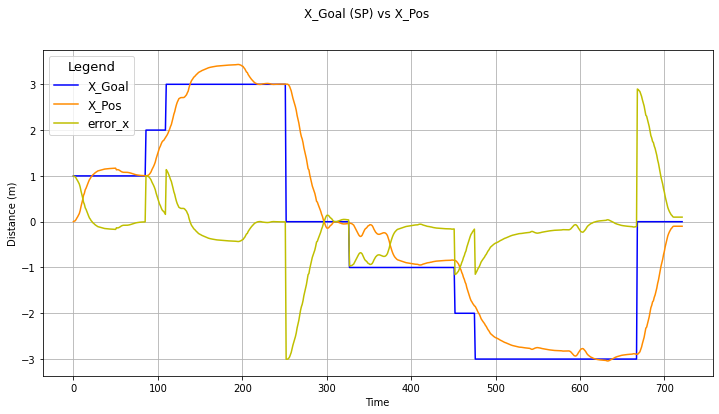

In [6]:
plot_pair(
    var1='X_Goal', 
    var2='X_Pos',
    var3='error_x',
    palette='magma', 
    color_var1='blue', 
    color_var2='darkorange',
    color_var3='y',
    title='X_Goal (SP) vs X_Pos', 
    xlabel='Time', 
    ylabel='Distance (m)'
)

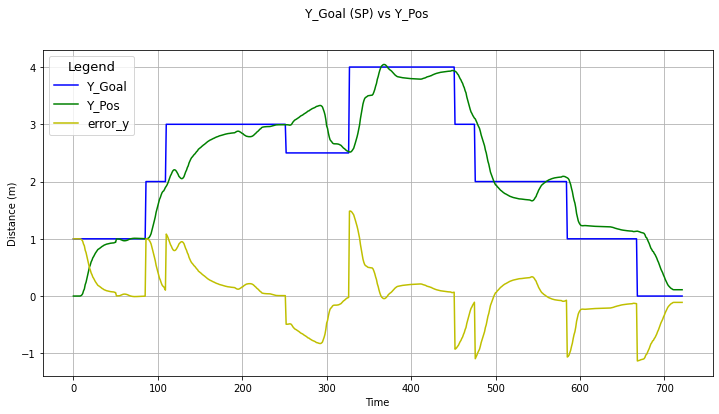

In [7]:
plot_pair(
    var1='Y_Goal', 
    var2='Y_Pos', 
    var3='error_y',
    palette='viridis', 
    color_var1='blue', 
    color_var2='green',
    color_var3='y',
    title='Y_Goal (SP) vs Y_Pos', 
    xlabel='Time', 
    ylabel='Distance (m)'
)

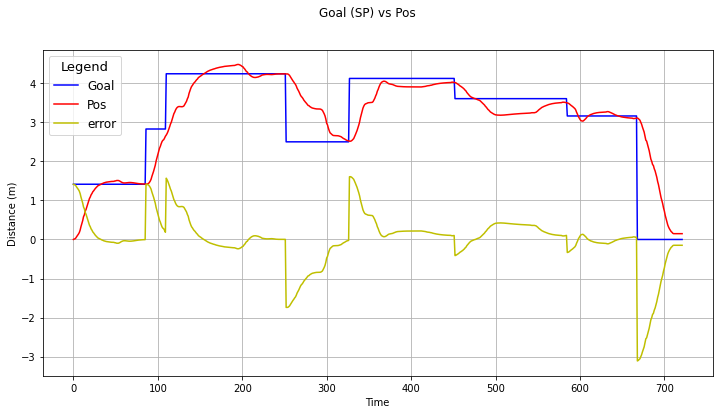

In [8]:
plot_pair(
    var1='Goal', 
    var2='Pos', 
    var3='error',
    palette='viridis', 
    color_var1='blue', 
    color_var2='red',
    color_var3='y',
    title='Goal (SP) vs Pos', 
    xlabel='Time', 
    ylabel='Distance (m)'
)

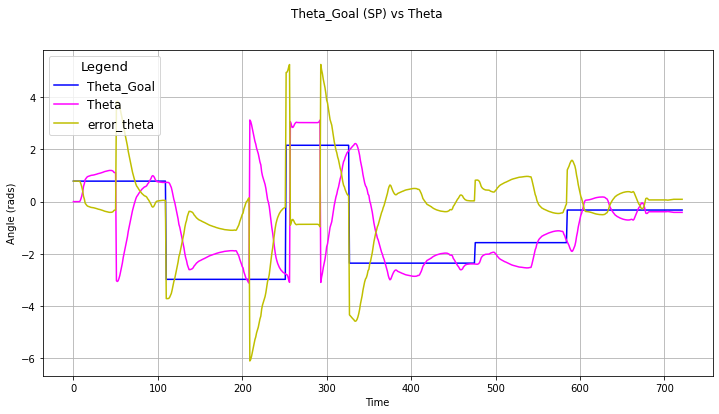

In [9]:
plot_pair(
    var1='Theta_Goal', 
    var2='Theta',
    var3='error_theta',
    palette='viridis', 
    color_var1='blue', 
    color_var2='magenta',
    color_var3='y',
    title='Theta_Goal (SP) vs Theta', 
    xlabel='Time', 
    ylabel='Angle (rads)'
)

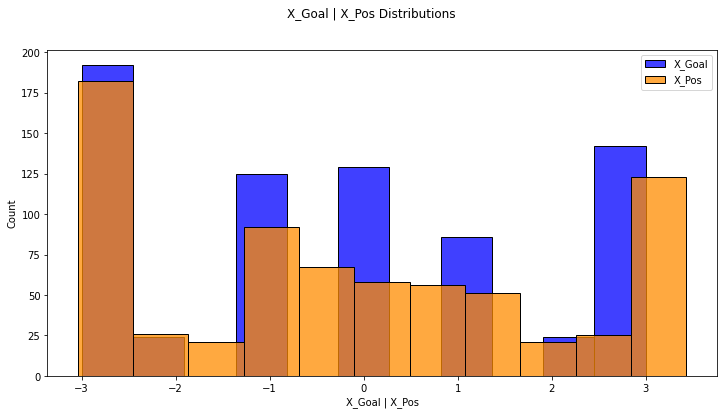

In [10]:
plot_distributions(var1='X_Goal', var2='X_Pos', var1_color='blue', var2_color='darkorange')

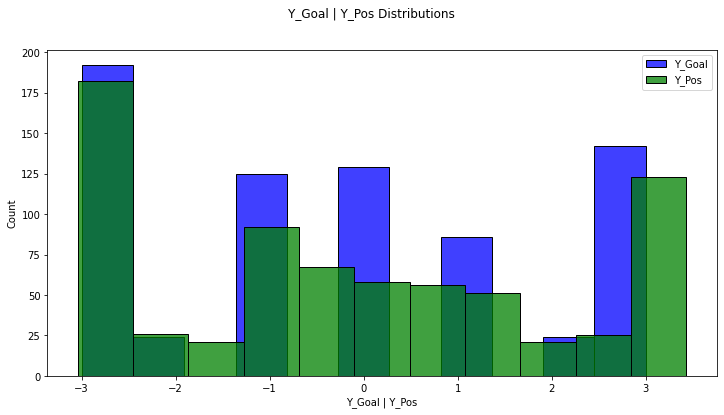

In [11]:
plot_distributions(var1='Y_Goal', var2='Y_Pos', var1_color='blue', var2_color='green')

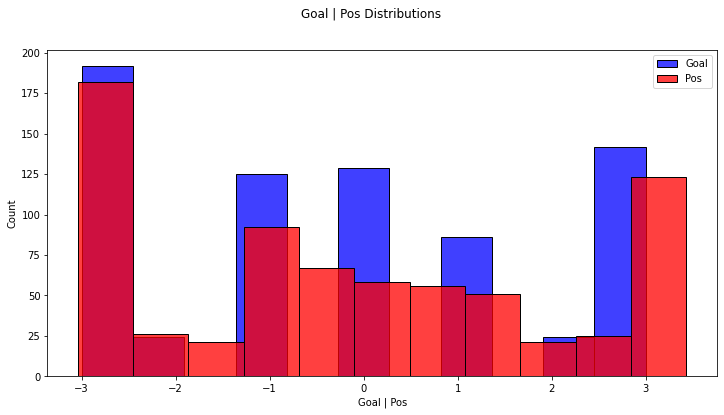

In [12]:
plot_distributions(var1='Goal', var2='Pos', var1_color='blue', var2_color='red')

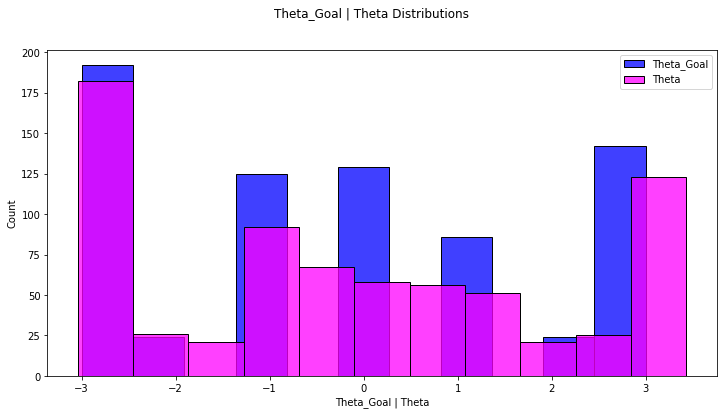

In [13]:
plot_distributions(var1='Theta_Goal', var2='Theta', var1_color='blue', var2_color='magenta')